# World Population

Analise de dados da Populacao mundial, base de dados disponivel no site Kaggle mo seguinte caminho: https://www.kaggle.com/datasets/whenamancodes/world-population-live-dataset

Estudos realizado para pratica de codigos em Python voltado da analise de dados.
Colunas:

1- CCA3: Código de três letras do país ou território (padrão ISO 3166-1 alpha-3).<br>
2- Name: Nome do país ou território.<br>
3- 2022, 2020, 2015, 2010, 2000, 1990, 1980, 1970: Estimativas ou dados populacionais para os anos específicos.<br>
4- Area (km²): Área terrestre do país em quilômetros quadrados.<br>
5- Density (per km²): Densidade populacional, ou seja, o número médio de pessoas por quilômetro quadrado.<br>
6- GrowthRate: Taxa de crescimento populacional.<br>
7- World Population Percentage: Percentagem da população mundial que o país representa.
8- Rank: Classificação do país em termos de população mundial em um determinado ano.


Algumas analises a serem realizadas:

1- População Mundial por Ano.<br>
2- Crescimento Populacional dos Top 5 Países (1970-2022).<br>
3- Top 10 - Areas (km²).<br>
4- Top 10 - Concentracao de Habitantes por km².<br>
5- Top 10 Paises com Maiores Populacoes em 2022.<br>
6- Previsao da Populacao para os proximos 10 anos.<br>

In [85]:
# Bibliotecas
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('ggplot')

In [86]:
# Importando os dados

df = pd.read_csv('Documents/Python/World_Population/World Population Live Dataset.csv')

# Analise dos dados.

In [87]:
df.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CCA3                         233 non-null    object 
 1   Name                         234 non-null    object 
 2   2022                         234 non-null    int64  
 3   2020                         234 non-null    int64  
 4   2015                         234 non-null    int64  
 5   2010                         234 non-null    int64  
 6   2000                         234 non-null    int64  
 7   1990                         234 non-null    int64  
 8   1980                         234 non-null    int64  
 9   1970                         234 non-null    int64  
 10  Area (km²)                   234 non-null    int64  
 11  Density (per km²)            234 non-null    float64
 12  GrowthRate                   234 non-null    float64
 13  World Population Per

In [89]:
df.describe()

,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,Rank
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,2.340000e+02,234.000000,234.000000,234.000000
mean,3.407441e+04,3.350109e+04,3.172995e+04,2.984523e+04,2.626947e+04,2.271024e+04,18984.645299,15786.876068,5.814494e+05,452.127044,1.009829,117.500000
std,1.367664e+05,1.355899e+05,1.304050e+05,1.242185e+05,1.116982e+05,9.783216e+04,81785.136077,67795.064322,1.761841e+06,2066.121904,0.013772,67.694165
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,0.026100,0.910000,1.000000
25%,4.197500e+02,4.150000e+02,4.045000e+02,3.930000e+02,3.272500e+02,2.642500e+02,229.500000,155.750000,2.650000e+03,38.417875,1.000000,59.250000
50%,5.560000e+03,5.493000e+03,5.307000e+03,4.943000e+03,4.293000e+03,3.825500e+03,3141.000000,2604.500000,8.119950e+04,95.346750,1.010000,117.500000
75%,2.247675e+04,2.144825e+04,1.973075e+04,1.915950e+04,1.576225e+04,1.186950e+04,9826.000000,8817.500000,4.304258e+05,238.933250,1.020000,175.750000
max,1.425887e+06,1.424930e+06,1.393715e+06,1.348191e+06,1.264099e+06,1.153704e+06,982372.000000,822534.000000,1.709824e+07,23172.266700,1.070000,234.000000


In [90]:
df.columns

Index(['CCA3', 'Name', '2022', '2020', '2015', '2010', '2000', '1990', '1980',
       '1970', 'Area (km²)', 'Density (per km²)', 'GrowthRate',
       'World Population Percentage', 'Rank'],
      dtype='object')

# Crescimento Populacional dos Países ao longo dos anos (1970-2022)

Somatória da população por ano:
1970    3694129
1980    4442407
1990    5314196
2000    6147055
2010    6983783
2015    7424808
2020    7839255
2022    7973413
dtype: int64


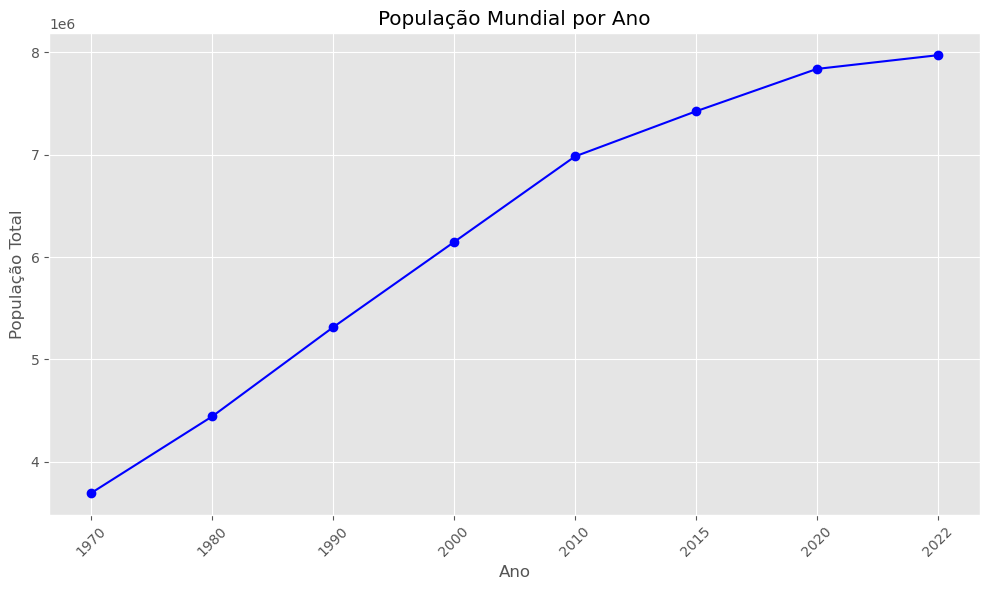

In [100]:
# Somatoria da populacao por ano.

# Selecionar apenas as colunas de anos para a soma
anos = ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

# Calcular a soma da população para cada ano
soma_por_ano = df[anos].sum()

# Mostrar o resultado
print("Somatória da população por ano:")
print(soma_por_ano)

# Plotar grafico de linhas.
plt.figure(figsize=(10, 6))
soma_por_ano.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('População Mundial por Ano')
plt.xlabel('Ano')
plt.ylabel('População Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        Name    1970    1980     1990     2000     2010     2015     2020  \
1      India  557501  696828   870452  1059634  1240614  1322867  1396387   
0      China  822534  982372  1153704  1264099  1348191  1393715  1424930   
4   Pakistan   59291   80624   115414   154370   194454   210969   227197   
5    Nigeria   55569   72951    95214   122852   160953   183996   208327   
3  Indonesia  115228  148177   182160   214072   244016   259092   271858   

      2022  Crescimento  
1  1417173       859672  
0  1425887       603353  
4   235825       176534  
5   218541       162972  
3   275501       160273  


/var/folders/j5/4r_5v3_n4mv_kpfnl6ckn5x80000gn/T/ipykernel_15475/1192324038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Crescimento'] = data['2022'] - data['1970']


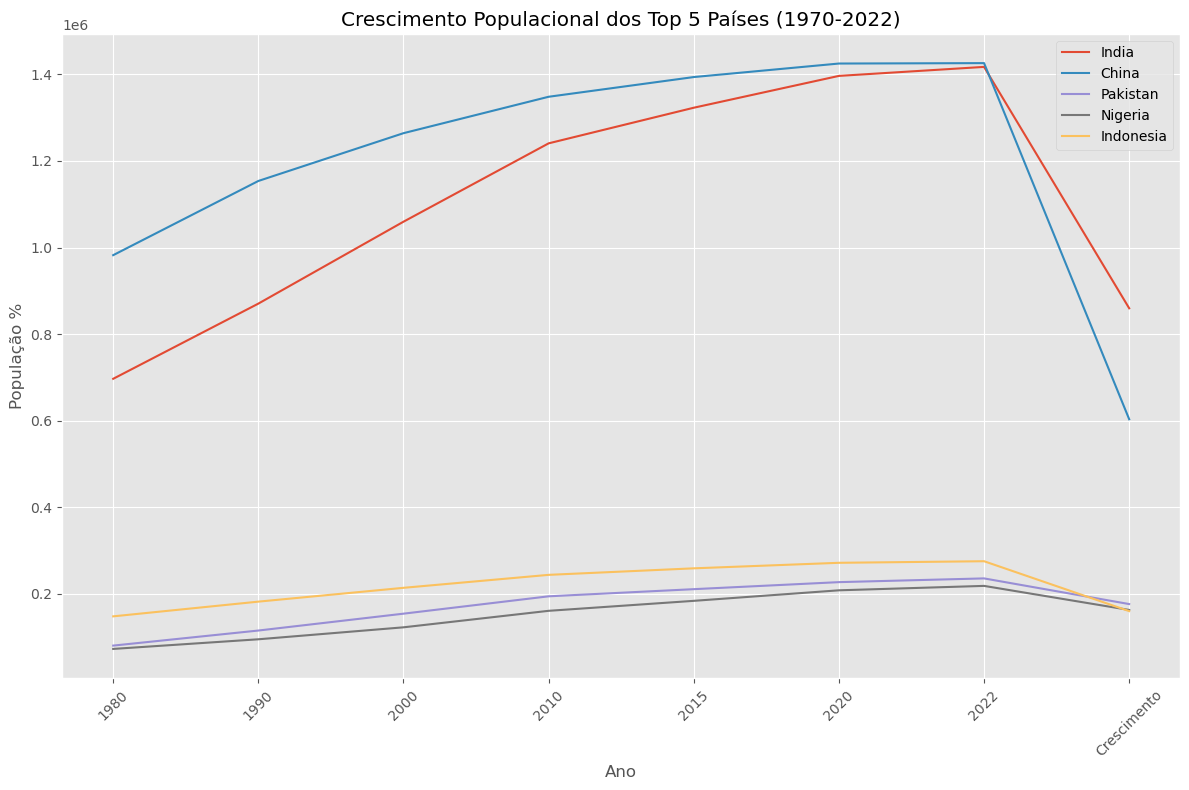

In [92]:
## Crescimento populacional Top_5 paises ao longo do tempo

#Selecionando os anos.
data = df[['Name', '1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']]

#Calculo do crescimento
data['Crescimento'] = data['2022'] - data['1970']

#Somente os Top_10.
top_5 = data.sort_values(by='Crescimento', ascending=False).head(5)
print (top_5)

#Grafico de linhas

plt.figure(figsize=(12, 8))
for index, row in top_5.iterrows():
    plt.plot(row.index[2:], row.values[2:], label=row['Name'])

plt.title('Crescimento Populacional dos Top 5 Países (1970-2022)')
plt.xlabel('Ano')
plt.ylabel('População %')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 - Areas (km²)

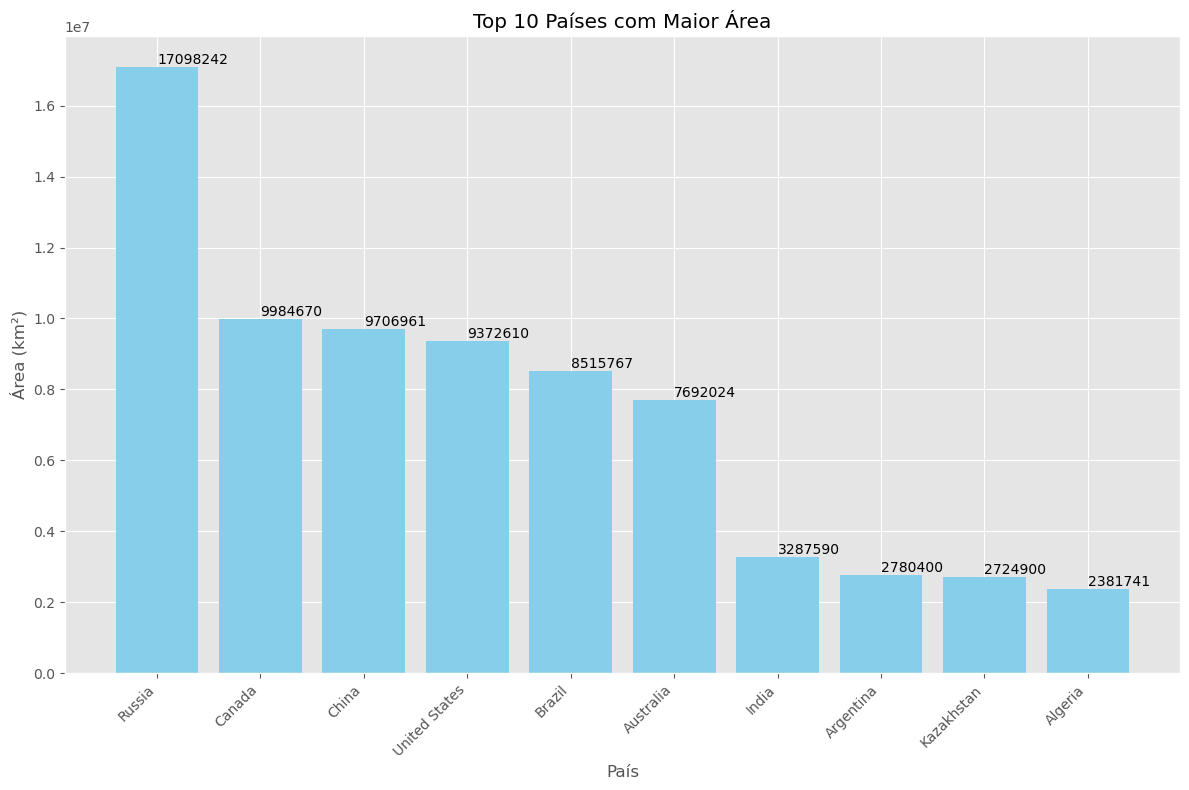

In [93]:
# Top 10 paises com maiores Area (km²).

top_10_area = df.nlargest(10, 'Area (km²)')

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_area['Name'], top_10_area['Area (km²)'], color='skyblue')

# Adicionar os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Top 10 Países com Maior Área')
plt.xlabel('País')
plt.ylabel('Área (km²)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()


# Top 10 - Concentracao de Habitantes por km².

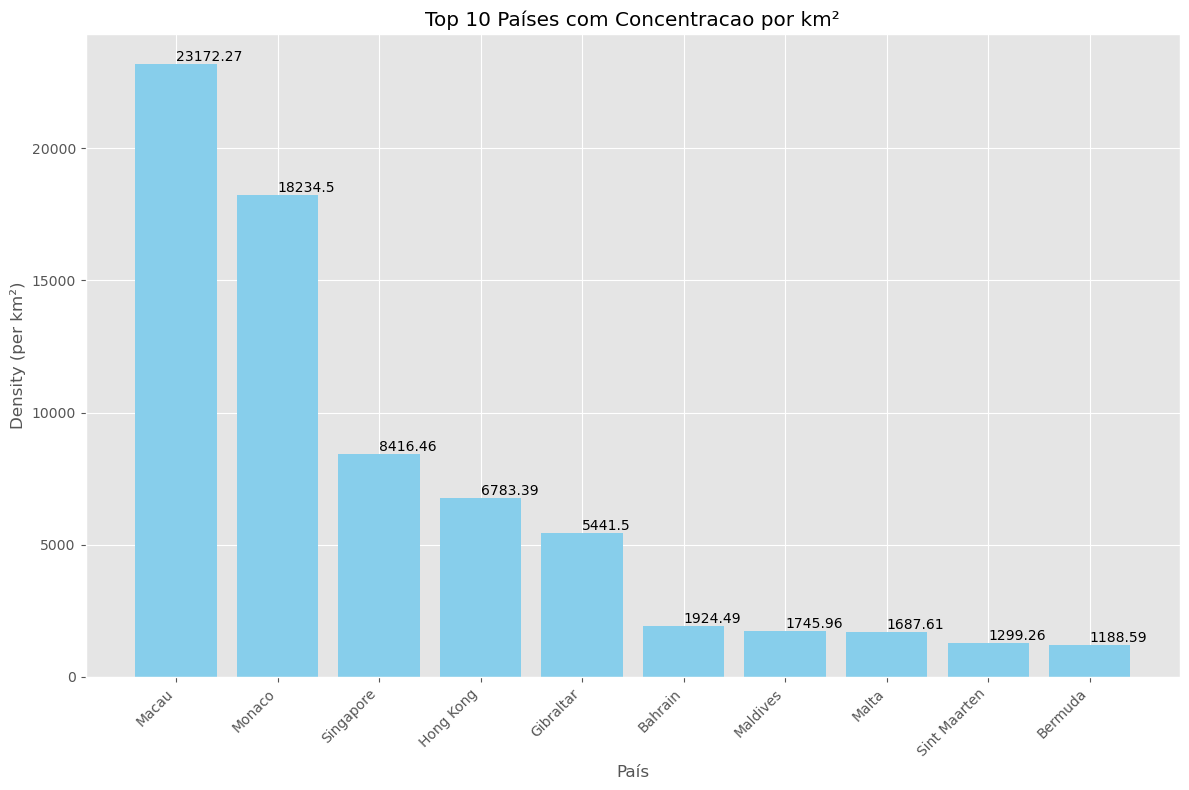

In [94]:
# Top 10 paises com maior concentracao por km²

top_10_concentracao_m2 = df.nlargest(10, 'Density (per km²)')

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_concentracao_m2['Name'], top_10_concentracao_m2['Density (per km²)'], color='skyblue')

# Adicionar os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Top 10 Países com Concentracao por km²')
plt.xlabel('País')
plt.ylabel('Density (per km²)')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()

# Top 10 Paises com Maiores Populacoes em 2022.

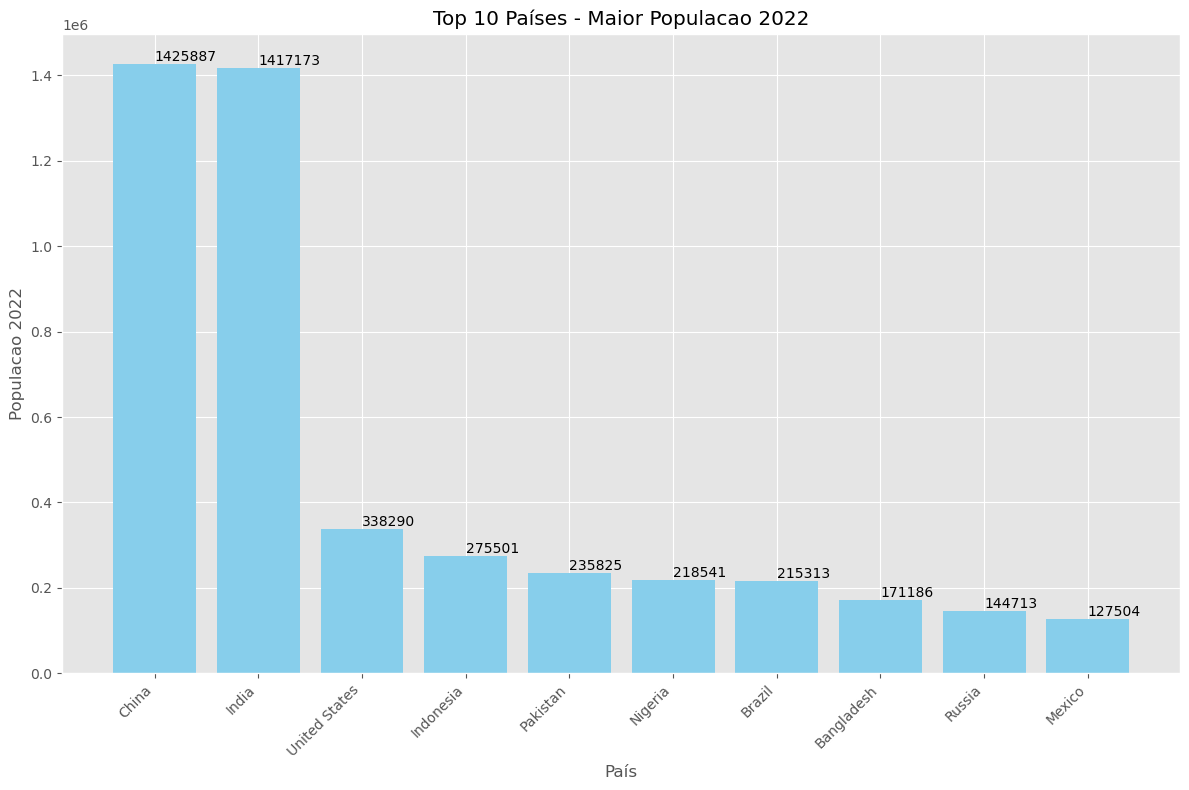

In [95]:
# Top 10 paises - Maior Populacao em 2022

top_10_pop_2022 = df.nlargest(10, '2022')

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_pop_2022['Name'], top_10_pop_2022['2022'], color='skyblue')

# Adicionar os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Top 10 Países - Maior Populacao 2022')
plt.xlabel('País')
plt.ylabel('Populacao 2022')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar cortes
plt.show()

# Previsao da Populacao para os proximos 10 anos.

Previsão de crescimento populacional para os próximos 10 anos:
2023    8.071966e+06
2024    8.155337e+06
2025    8.238708e+06
2026    8.322079e+06
2027    8.405450e+06
2028    8.488821e+06
2029    8.572192e+06
2030    8.655563e+06
2031    8.738935e+06
2032    8.822306e+06
dtype: float64


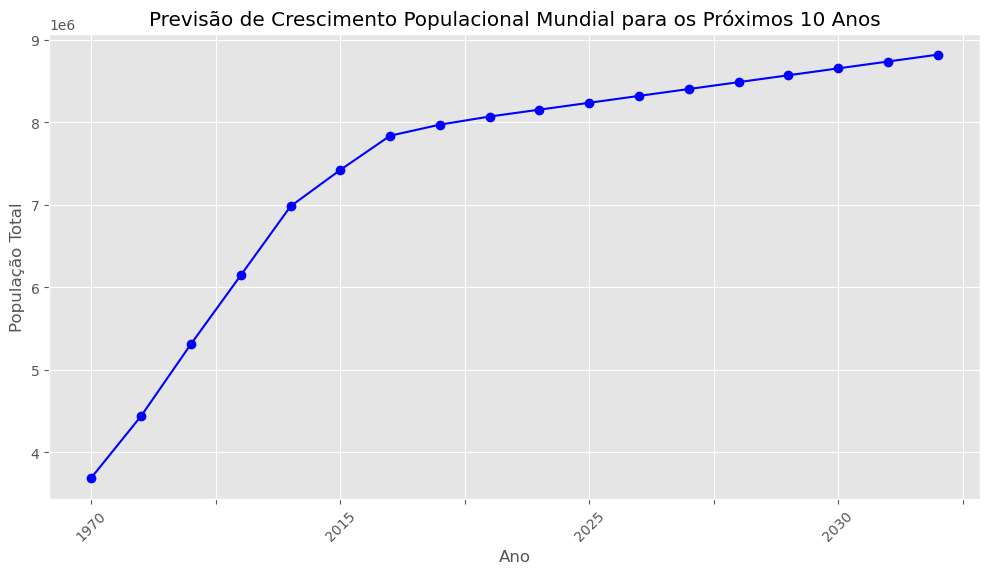

In [96]:
# Calcular a soma da população para cada ano
soma_por_ano = df[anos].sum()

# Ajustar um modelo de regressão linear aos dados históricos
anos_numericos = pd.to_numeric(anos)
modelo = LinearRegression().fit(anos_numericos.reshape(-1, 1), soma_por_ano)

# Gerar previsões para os próximos 10 anos
proximos_anos = range(2023, 2033)
previsoes = modelo.predict(pd.to_numeric(proximos_anos).reshape(-1, 1))

# Adicionar as previsões ao DataFrame
for ano, previsao in zip(proximos_anos, previsoes):
    soma_por_ano[str(ano)] = previsao

# Mostrar o resultado das previsões
print("Previsão de crescimento populacional para os próximos 10 anos:")
print(soma_por_ano.iloc[-10:])

# Plotar o gráfico de linhas com as previsões
plt.figure(figsize=(10, 6))
soma_por_ano.plot(kind='line', marker='o', color='b', linestyle='-', ax=plt.gca())
plt.title('Previsão de Crescimento Populacional Mundial para os Próximos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('População Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [97]:
# Último ano da previsão
ultimo_ano_previsao = proximos_anos[-1]

# População projetada para o último ano da previsão
populacao_projetada_ultimo_ano = soma_por_ano[str(ultimo_ano_previsao)]

# População do ano anterior ao último ano da previsão
populacao_ano_anterior = soma_por_ano[str(ultimo_ano_previsao - 1)]

# Calcular a previsão de crescimento da população em porcentagem
previsao_crescimento_percentual = ((populacao_projetada_ultimo_ano - populacao_ano_anterior) / populacao_ano_anterior) * 100

print(f"A previsão de crescimento da população em % para o ano {ultimo_ano_previsao} é de: {previsao_crescimento_percentual:.2f}%")

A previsão de crescimento da população em % para o ano 2032 é de: 0.95%
